# 波士顿房价数据探索

该数据集来自UCI机器学习知识库。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋13种特征和房价的信息。
本项目将原始数据集存为csv格式，方便调用pandas做数据分析。

## 导入必要的工具包

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 读取数据

In [2]:
# path to where the data lies
dpath = './data/'
data = pd.read_csv(dpath +"boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


## 数据基本信息

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.4 KB


In [4]:
### 查看是否有空值
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 探索数据

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

我们可以借用可视化工具来直观感觉数据的分布。

在Python中，有很多数据可视化途径。
Matplotlib非常强大，也很复杂，不易于学习。 
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

In [5]:
## 各属性的统计特性
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
可初步了解各特征的分布

### 单变量分布分析

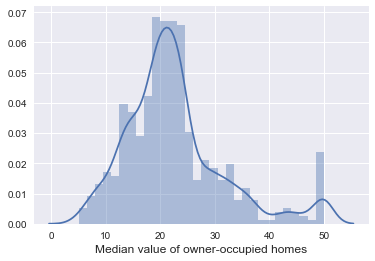

In [6]:
# 目标y（房屋价格）的直方图／分布
fig = plt.figure()
sns.distplot(data.MEDV.values, bins=30, kde=True)
plt.xlabel('Median value of owner-occupied homes', fontsize=12)
plt.show()

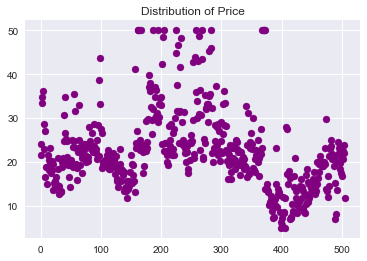

In [7]:
# 单个特征散点图
plt.scatter(range(data.shape[0]), data["MEDV"].values,color='purple')
plt.title("Distribution of Price");

可以看出，数据大多集中在均值（22.5）附近，和正态分布比较接近。但最大值50的样本数目偏多，可能是原始数据将所有大于50的样本的值都设置为50（猜测），在模型训练时也可以考虑将y等于50的样本当成outliers（离群点）去掉。

In [8]:
# 删除y大于40的样本
data = data[data.MEDV < 50]

In [9]:
data.shape

(490, 14)

## 输入属性的直方图／分布

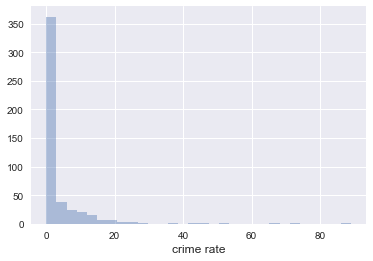

In [10]:
fig = plt.figure()
sns.distplot(data.CRIM.values, bins=30, kde=False)
plt.xlabel('crime rate', fontsize=12)
plt.show()

犯罪率特征的分布是长尾分布，和指数分布比较接近。大部分城镇的犯罪率很低，极少数样本的犯罪率高。从常理看，该数值应该比较准确，可以不予处理。

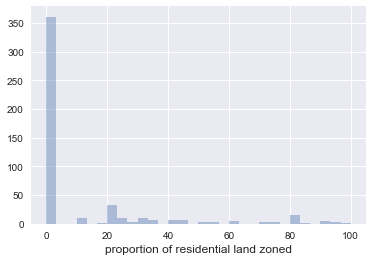

In [11]:
fig = plt.figure()
sns.distplot(data.ZN.values, bins=30, kde=False)
plt.xlabel('proportion of residential land zoned', fontsize=12)
plt.show()

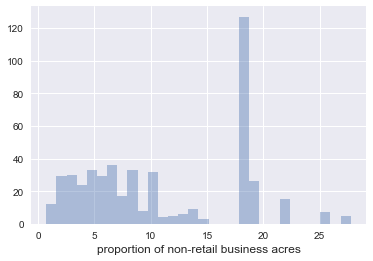

In [12]:
fig = plt.figure()
sns.distplot(data.INDUS.values, bins=30, kde=False)
plt.xlabel('proportion of non-retail business acres', fontsize=12)
plt.show()

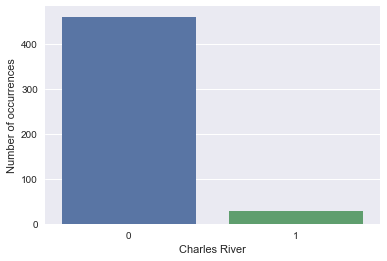

In [13]:
sns.countplot(data.CHAS, order=[0, 1]);
plt.xlabel('Charles River');
plt.ylabel('Number of occurrences');

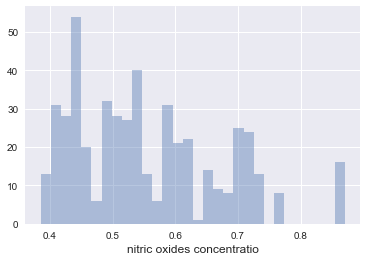

In [14]:
fig = plt.figure()
sns.distplot(data.NOX.values, bins=30, kde=False)
plt.xlabel('nitric oxides concentratio', fontsize=12)
plt.show()

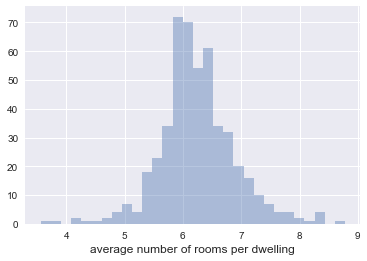

In [15]:
fig = plt.figure()
sns.distplot(data.RM.values, bins=30, kde=False)
plt.xlabel('average number of rooms per dwelling', fontsize=12)
plt.show()

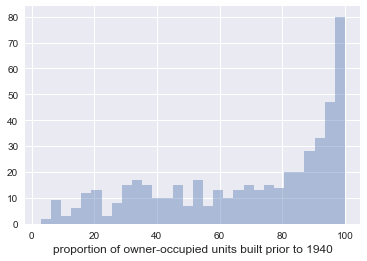

In [16]:
fig = plt.figure()
sns.distplot(data.AGE.values, bins=30, kde=False)
plt.xlabel('proportion of owner-occupied units built prior to 1940', fontsize=12)
plt.show()

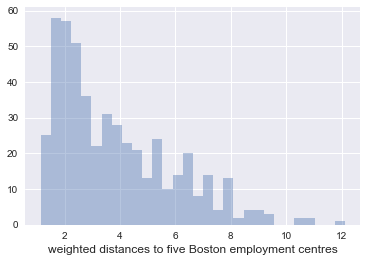

In [17]:
fig = plt.figure()
sns.distplot(data.DIS.values, bins=30, kde=False)
plt.xlabel('weighted distances to five Boston employment centres', fontsize=12)
plt.show()

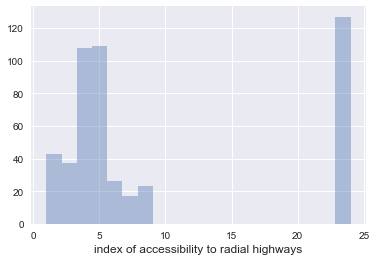

In [18]:
fig = plt.figure()
sns.distplot(data.RAD.values, bins=20, kde=False)
plt.xlabel('index of accessibility to radial highways', fontsize=12)
plt.show()

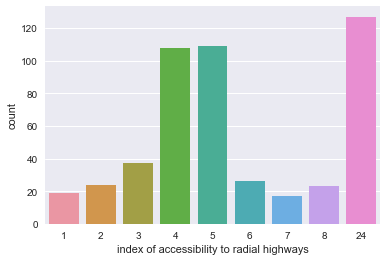

In [19]:
sns.countplot(data.RAD);
plt.xlabel('index of accessibility to radial highways');

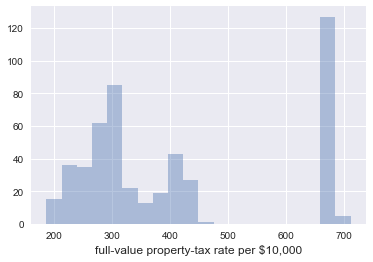

In [20]:
fig = plt.figure()
sns.distplot(data.TAX.values, bins=20, kde=False)
plt.xlabel('full-value property-tax rate per $10,000', fontsize=12)
plt.show()

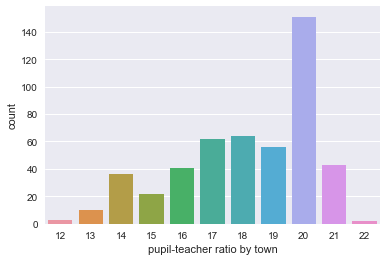

In [21]:
sns.countplot(data.PTRATIO);
plt.xlabel('pupil-teacher ratio by town');

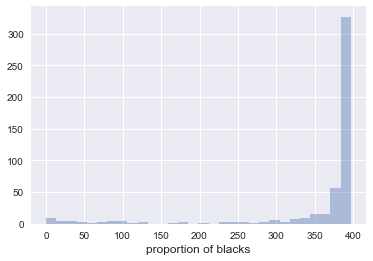

In [22]:
fig = plt.figure()
sns.distplot(data.B.values, bins=30, kde=False)
plt.xlabel('proportion of blacks', fontsize=12)
plt.show()

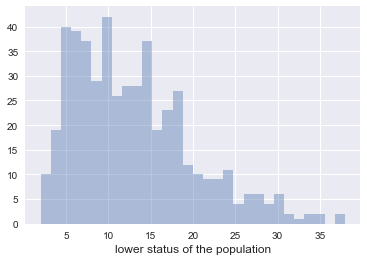

In [23]:
fig = plt.figure()
sns.distplot(data.LSTAT.values, bins=30, kde=False)
plt.xlabel('lower status of the population', fontsize=12)
plt.show()

## 两两特征之间的相关性

In [24]:
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()

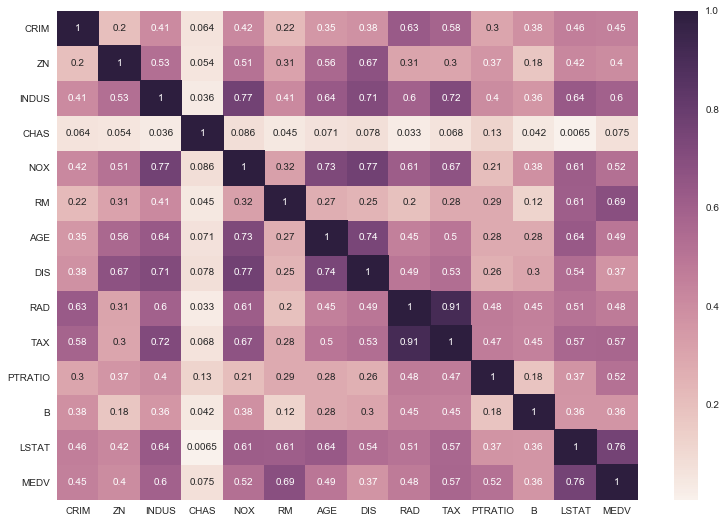

In [25]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('house_coor.png' )
plt.show()

In [26]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
size = data.shape[1]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

RAD and TAX = 0.91
NOX and DIS = 0.77
INDUS and NOX = 0.77
LSTAT and MEDV = 0.76
AGE and DIS = 0.74
NOX and AGE = 0.73
INDUS and TAX = 0.72
INDUS and DIS = 0.71
RM and MEDV = 0.69
ZN and DIS = 0.67
NOX and TAX = 0.67
INDUS and AGE = 0.64
AGE and LSTAT = 0.64
INDUS and LSTAT = 0.64
CRIM and RAD = 0.63
NOX and LSTAT = 0.61
NOX and RAD = 0.61
RM and LSTAT = 0.61
INDUS and MEDV = 0.60
INDUS and RAD = 0.60
CRIM and TAX = 0.58
TAX and MEDV = 0.57
TAX and LSTAT = 0.57
ZN and AGE = 0.56
DIS and LSTAT = 0.54
DIS and TAX = 0.53
ZN and INDUS = 0.53
NOX and MEDV = 0.52
PTRATIO and MEDV = 0.52
ZN and NOX = 0.51
RAD and LSTAT = 0.51


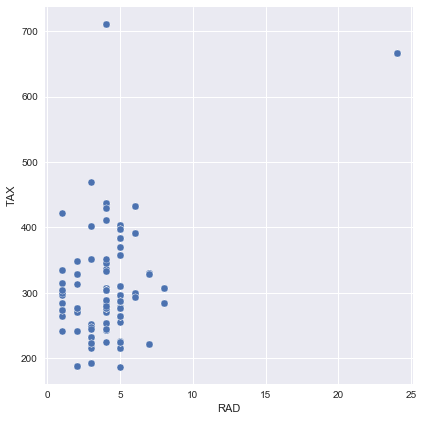

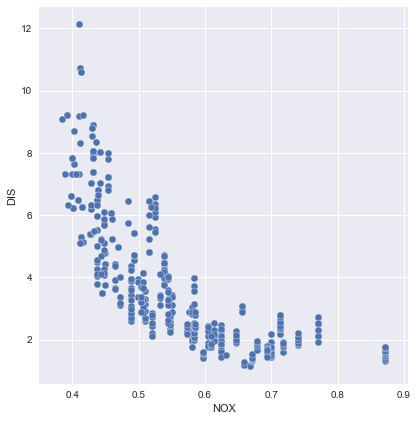

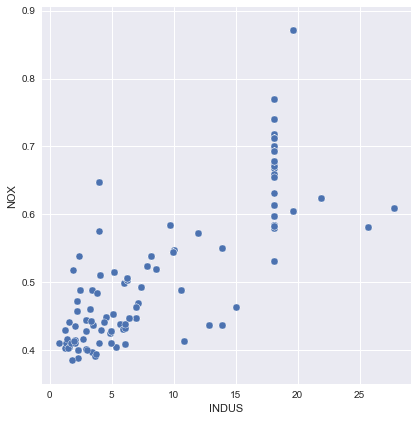

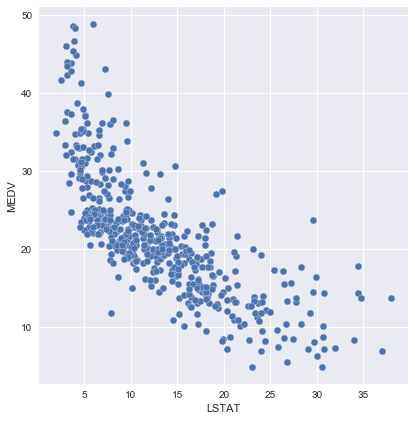

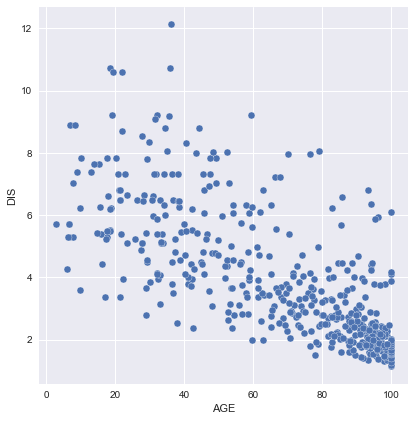

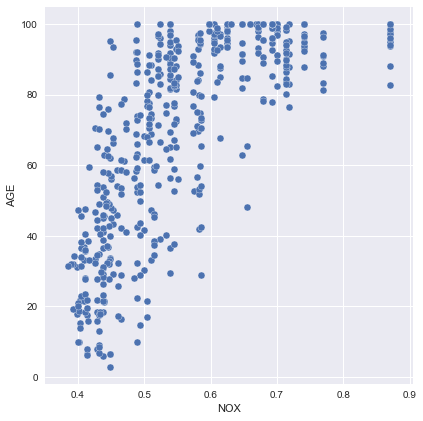

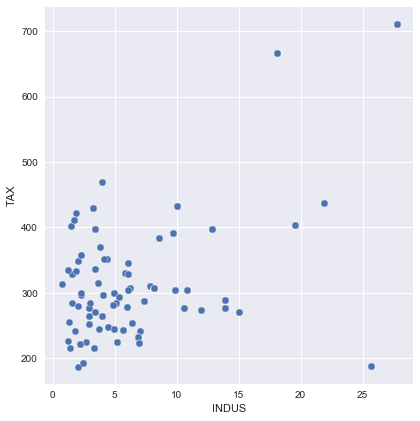

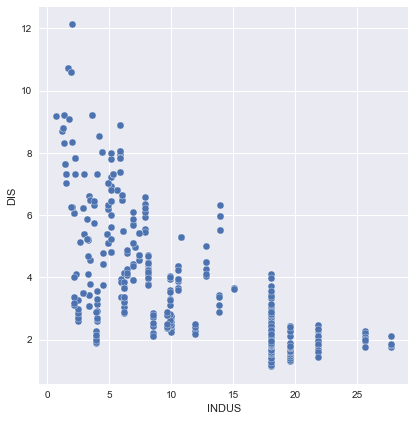

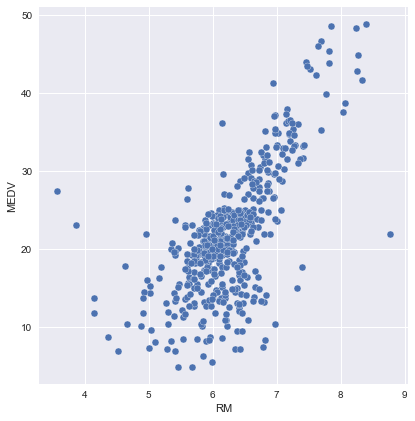

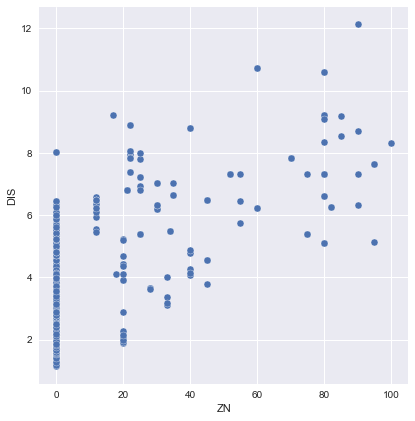

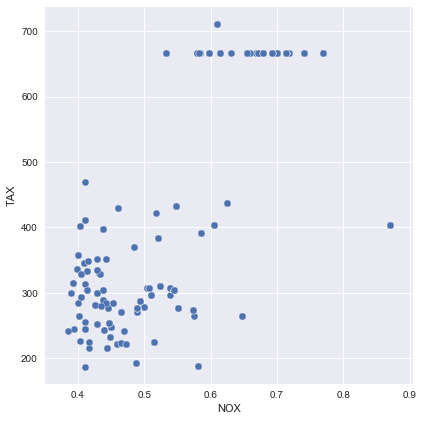

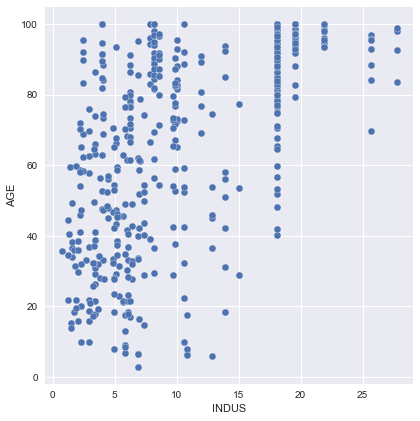

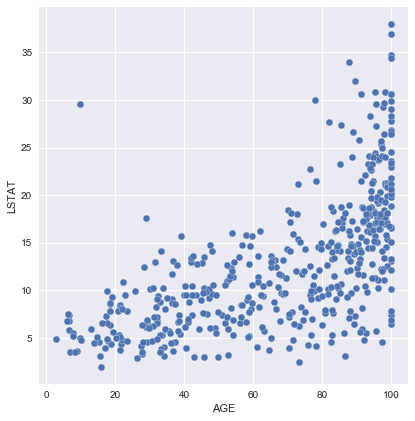

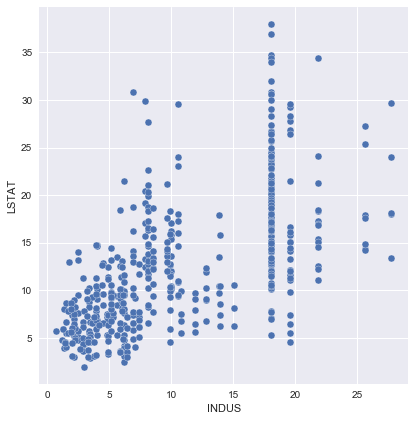

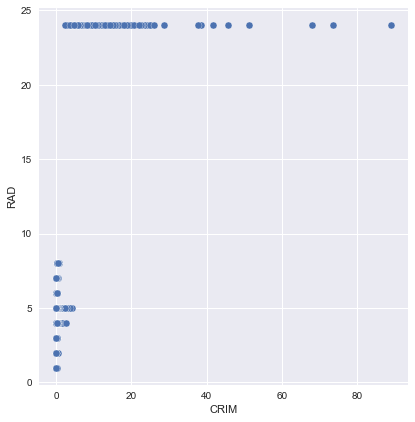

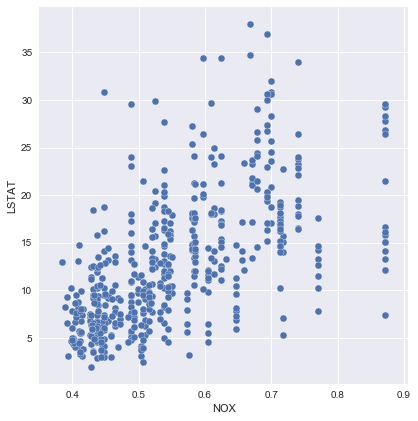

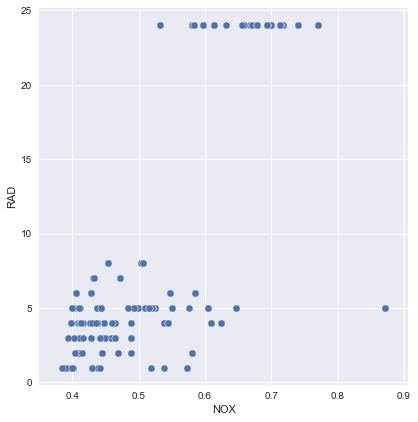

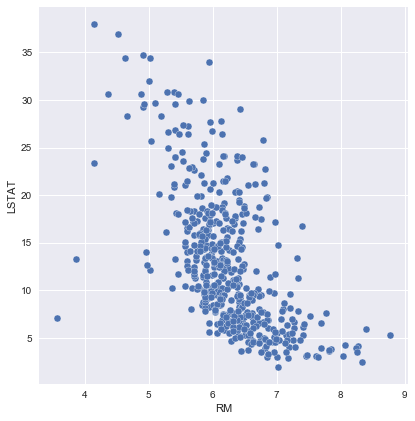

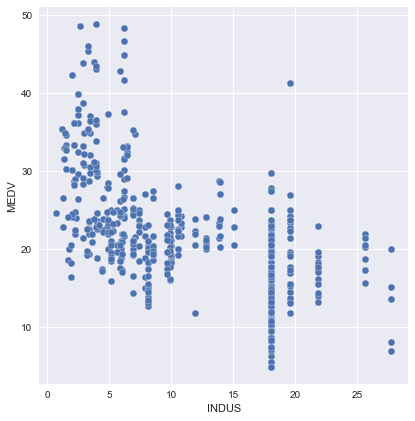

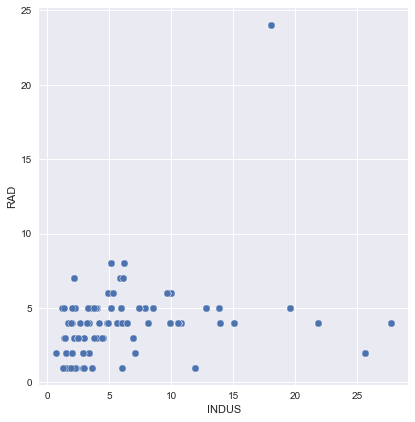

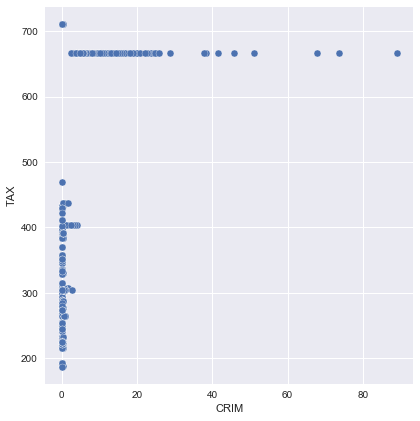

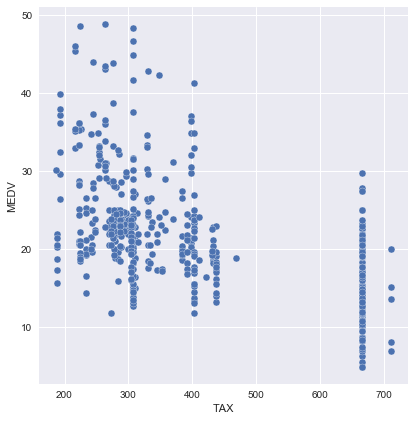

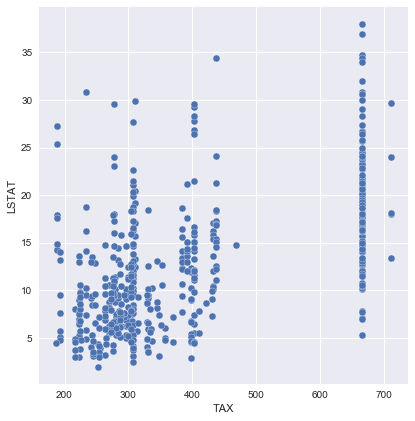

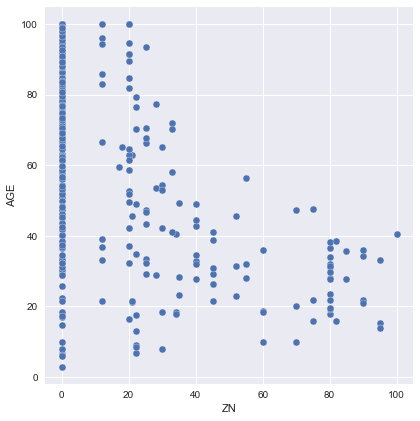

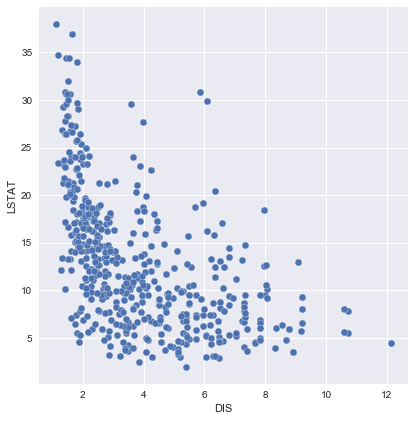

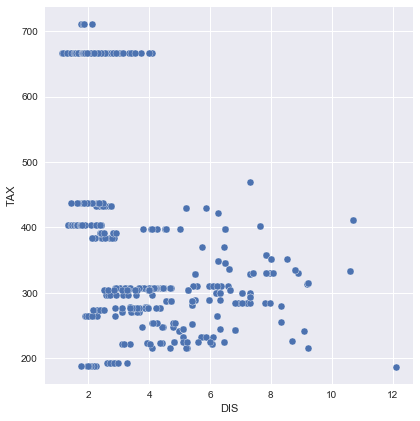

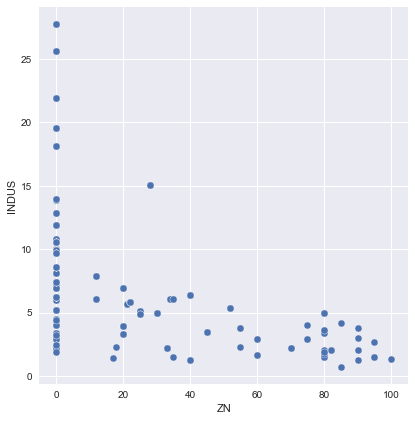

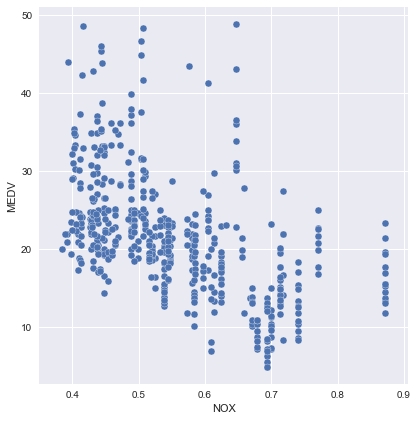

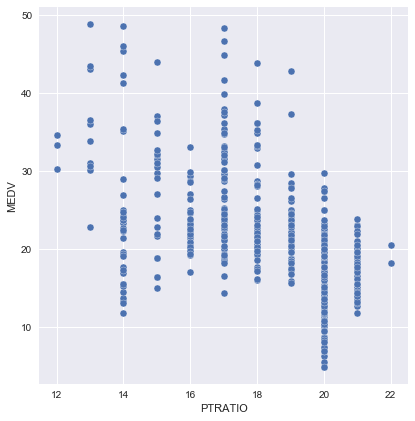

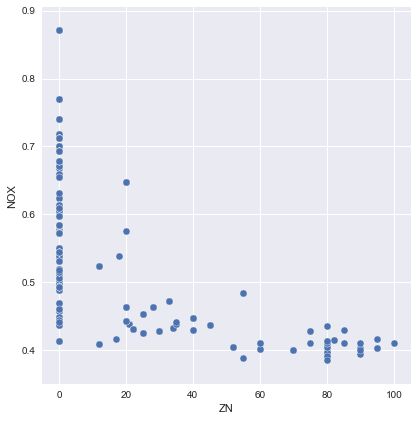

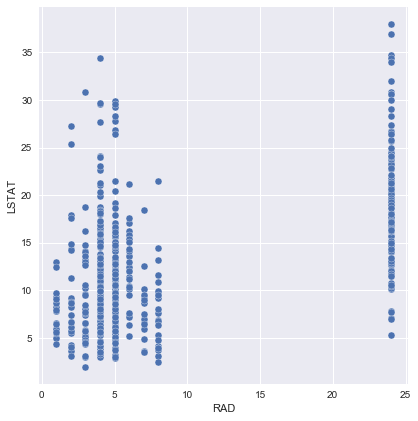

In [27]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()